In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\VANSHIKA  JAIN\Downloads\housing.csv",usecols=['longitude','latitude','median_house_value'])

In [3]:
dir(pd)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__deprecated_num_index_names',
 '__dir__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '_typing',
 '_ve

In [4]:
df

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0
...,...,...,...
20635,-121.09,39.48,78100.0
20636,-121.21,39.49,77100.0
20637,-121.22,39.43,92300.0
20638,-121.32,39.43,84700.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

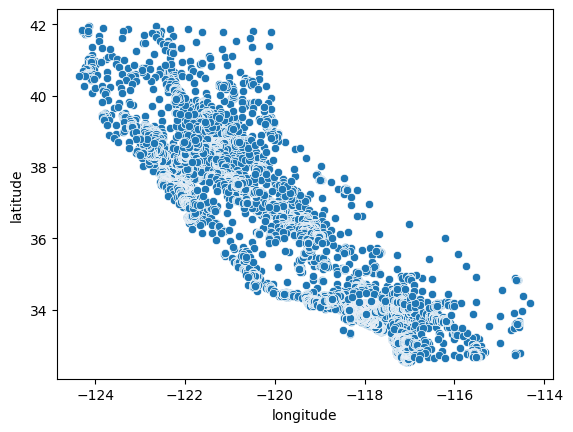

In [9]:
sns.scatterplot(data=df,x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

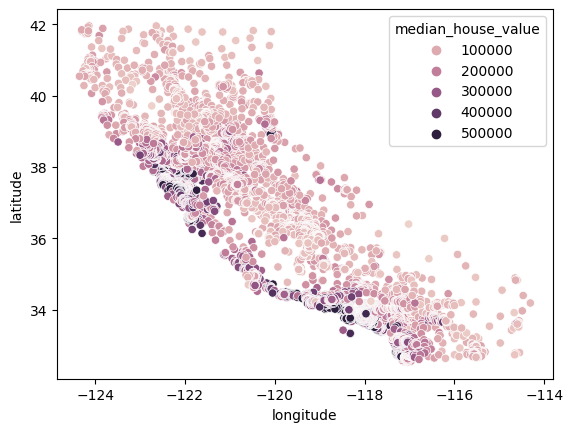

In [10]:
sns.scatterplot(data=df,x='longitude',y='latitude',hue='median_house_value')#to add more depth to it

In [12]:
df.describe()#we need to normalize the data


,longitude,latitude,median_house_value
count,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,206855.816909
std,2.003532,2.135952,115395.615874
min,-124.350000,32.540000,14999.000000
25%,-121.800000,33.930000,119600.000000
50%,-118.490000,34.260000,179700.000000
75%,-118.010000,37.710000,264725.000000
max,-114.310000,41.950000,500001.000000


In [13]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df[['longitude','latitude']],df['median_house_value'],test_size=0.3,random_state=2)

In [15]:
X_train_norm=preprocessing.normalize(X_train)

In [20]:
X_train_norm #-1 to +1 values

array([[-0.96135142,  0.27532426],
       [-0.95002883,  0.31216217],
       [-0.96114587,  0.27604096],
       ...,
       [-0.95212821,  0.30569898],
       [-0.96064767,  0.2777698 ],
       [-0.949999  ,  0.31225295]])

In [21]:
X_test_norm=preprocessing.normalize(X_test)

In [22]:
X_test_norm

array([[-0.96155478,  0.27461318],
       [-0.95258684,  0.30426684],
       [-0.96120116,  0.27584839],
       ...,
       [-0.95469043,  0.29760071],
       [-0.96096831,  0.27665845],
       [-0.95696753,  0.290195  ]])

In [24]:
from sklearn.cluster import KMeans

In [29]:
clus=KMeans()

In [49]:
clus=KMeans(n_clusters=3,random_state=2,n_init=10)#by default uses n=8, auto will choose between centroid or k means

In [50]:
clus.fit(X_train_norm)#here we are not passing the target that is unsupervised

KMeans(n_clusters=3, random_state=2)

In [51]:
clus.labels_

array([1, 2, 1, ..., 2, 1, 2])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

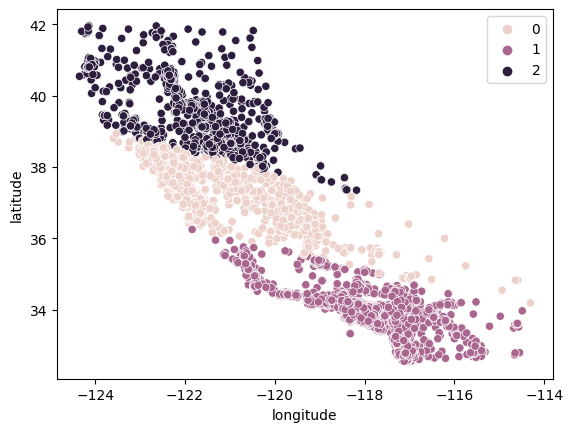

In [52]:
sns.scatterplot(data=X_train,x='longitude',y='latitude',hue=clus.labels_)

In [53]:
from sklearn.metrics import silhouette_score 

In [54]:
silhouette_score(X_train_norm,clus.labels_,metric='euclidean')#for n=5 s=0.64 and for n=3 s=0.75

0.7525039085893401

In [57]:
k=range(2,10)
fits=[]
score=[]
for i in k:
    model=KMeans(n_clusters=i,random_state=2,n_init=10).fit(X_train_norm)
    s=silhouette_score(X_train_norm,model.labels_,metric='euclidean')
    score.append(s)
    fits.append(model)

<AxesSubplot:>

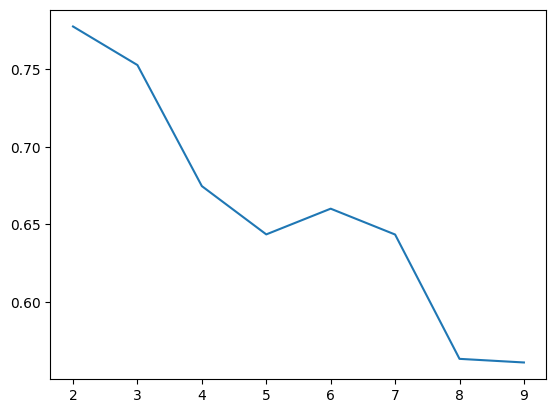

In [59]:
sns.lineplot(x=k,y=score)